<a href="https://colab.research.google.com/github/ARU-Bioinformatics/advanced-programming-SBV/blob/main/Simple_python_ODE_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple ODE simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

lets simulate a system with the following behviour:

$dy/dt = a*y$                                                 

Here, we call the solution y(t), where y(t) is a vector that contains all the time dependent variables (here this is just [y(t)])

In order to run a simulation, we need to define our ordinary differential equations (ODE) by a function.
The input to this function is the state of the three groups in a single time point - y, and compute how they change  - dy

In [2]:

def ParametricNDSolveValue(y,t):
        a  = 0.1   #it is optional to define the parameters within the ODE function
        dy = np.empty(1)
        dy[0] = a*y
        return dy


Finally, in order to run the simulation we will use a off-the shelf ODE solver, provided within scipy.integrate package

The first argument that this solver recives is the ODE function that we defined.
The seconde argument is the intial condition, lets start with y(0) = 1.
The third argument is the timeframe of the simulation (t0,tmax)

lets simulate 100 days. In order to do so, I use numpy packge to create a vector of 100 days - 

In [3]:
t0   = 0
tmax = 100
dt   = 1
time = np.arange(t0,tmax,dt)

y0   = 1
sol  = odeint(ParametricNDSolveValue,y0,time)

Finally, I create a Dataframe from the solution in order to plot it nice and easy
Dataframe is a great way to store and handel information in python.

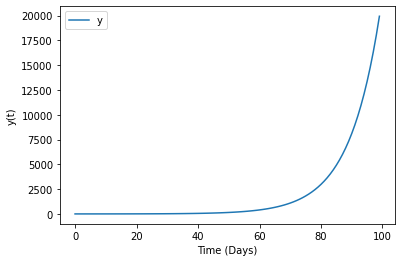

In [4]:

df = pd.DataFrame(sol,columns=['y'],index = time)
df.plot()
plt.xlabel('Time (Days)')
plt.ylabel('y(t)')
plt.show()

Lets check that this is true,
The solution y(t) for $dy/dt = a*y$ is:
$y(t) = e**(ay)$

lets plot the analytical solution y(t), and compare it to our numerical simulation:

In [5]:

a = 0.1;
y = [] # create empty list to store y values in range t0-tmax
for t in time:
    y.append( np.e**(a*t) )
    


It is possible to write the whole loop within one line:
y = [np.e**(a*t) for t in time]

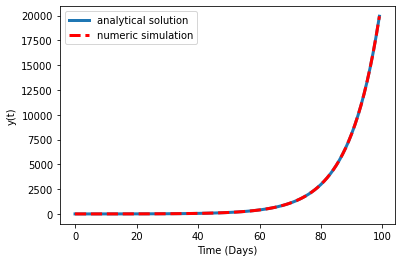

In [6]:
plt.plot(time,y,lw=3)
plt.plot(df,'--r',lw=3)
plt.legend(['analytical solution','numeric simulation'])
plt.xlabel('Time (Days)')
plt.ylabel('y(t)')
plt.show()

We can think of more complex case, where:

$dx1/dt = a*x2 - b*x1$        

$dx2/dt = c    - d*x2$                                            
In this case, y(t) is a vector [x1(t),x2(t)]


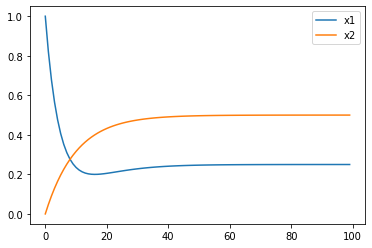

In [7]:

def ParametricNDSolveTwoValues(y,t):
        [x1,x2] = y
        
        a = 1; b = 2; c = 0.5; d = 1
        
        dy = np.empty(2)
        dy[0] = a*x2 - b*x1 
        dy[1] = c    - d*x2
        return dy

t0   = 0
tmax = 10
dt   = 0.1
time = np.arange(t0,tmax,dt)
sol  = odeint(ParametricNDSolveTwoValues,[1,0],time)
df   = pd.DataFrame(sol,columns=['x1','x2'])
df.plot()